# Data Gathering

### import liberaries 

In [290]:
import pandas as pd
import numpy as np
import requests
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
from functools import reduce
%matplotlib inline
from matplotlib import pyplot as plt

### Reading the files

In [291]:
image = pd.read_csv('image-predictions.tsv', sep='\t')

twits = pd.read_csv('twitter-archive-enhanced.csv')

data = pd.read_json('tweet-json.txt', lines=True)


In [292]:
data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [293]:
twits.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [294]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Data Assessment

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [296]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [297]:
twits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### check if there is duplicate columns

In [298]:
image[image.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [299]:
twits[twits.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### check null values

In [300]:
data.isnull().sum().sum()


30513

In [301]:
twits.isnull().sum().sum()


11140

In [302]:
image.isnull().sum().sum()


0

### checking if there is duplicated columns 

In [303]:
all_columns = pd.Series(list(twits) + list(data)+ list(image))
all_columns[all_columns.duplicated()]

30    in_reply_to_status_id
32      in_reply_to_user_id
45                   source
48                 tweet_id
dtype: object

# Cleaning tables

### Define

#### first i will copy the tables to start clean

In [304]:
twits_clean = twits.copy()
data_clean = data.copy()
image_clean = image.copy()

### Define

drop the unnecessary columns with no values 

### Code

In [305]:
data_clean.drop(['contributors', 'coordinates','geo','place'], axis=1, inplace=True)

### Test

In [306]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2

### Define

	Extracting the url from source column

### Code

In [307]:
data_clean.source = data_clean.source.apply(lambda x: re.findall(r'>(.*)<', x )[0])

### Test 

In [308]:
data_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Define

Change id column name to be tweet_id 

### Code

In [309]:
data_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [310]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2

### Define

change the data type of timestamp column

### Code

In [311]:
twits_clean.timestamp= pd.to_datetime(twits_clean.timestamp ) 

### Test

In [312]:
twits_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define

rearrange columns ( doggo - floofer - pupper - puppo ) to be values in one column dog_stage

### Code

In [313]:
twits_clean.iloc[:, -4:  ] = twits_clean.iloc[:, -4:  ].replace('None','')

In [314]:
twits_clean['dog_stage'] = twits_clean.doggo + twits_clean.floofer + twits_clean.pupper + twits_clean.puppo

In [315]:
twits_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [316]:
twits_clean.loc[twits_clean.dog_stage == "", 'dog_stage'] = np.nan

In [317]:
twits_clean.loc[twits_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
twits_clean.loc[twits_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
twits_clean.loc[twits_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

In [318]:
twits_clean.dog_stage.value_counts(dropna = False)

NaN              1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

### Test

In [319]:
twits_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Define

Extracting the url from source column

### Code

In [320]:
twits_clean.source = twits_clean.source.apply(lambda x: re.findall(r'>(.*)<', x )[0])

### Test

In [321]:
twits_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Define

Remove retweets 

### Code

In [322]:
twits_clean = twits_clean[twits_clean.in_reply_to_status_id.isnull()]

### Test

In [323]:
twits_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
dog_stage                     372 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 267.0+ KB


### Define

Remove replies

### Code

In [324]:
twits_clean = twits_clean[twits_clean.retweeted_status_id.isnull()]

### Test

In [325]:
twits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stage                     336 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 245.7+ KB


### Define

Remove un neccessary columns ( in_reply_to_status_id & retweeted_status_user_id & retweeted_status_id & in_reply_to_user_id & retweeted_status_timestamp )

### Code

In [326]:
twits_clean.drop(['in_reply_to_status_id', 'retweeted_status_user_id' , 'retweeted_status_id' , 'in_reply_to_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [327]:
twits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


In [328]:
twits_clean.head ()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Define

Replace None values to be NaN in name column

### Code

In [329]:
twits_clean['name'].replace('None', np.nan, inplace=True)

### Test

In [330]:
twits_clean[twits_clean['name'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
24,887343217045368832,2017-07-18 16:08:03,Twitter for iPhone,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,NaN,NaN
25,887101392804085760,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,NaN
35,885518971528720385,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,NaN,NaN
37,885167619883638784,2017-07-12 16:03:00,Twitter for iPhone,Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,10,NaN,NaN
41,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,NaN,NaN
42,884247878851493888,2017-07-10 03:08:17,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,NaN,NaN
47,883117836046086144,2017-07-07 00:17:54,Twitter for iPhone,Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,NaN,NaN


### Define

Remove tweets with no image

### Code

In [331]:
twits_image = list(image_clean.tweet_id.unique())

In [332]:
len(twits_image) == twits_clean.tweet_id.isin(twits_image).sum()

False

In [333]:
twits_clean = twits_clean[twits_clean.tweet_id.isin(twits_image)]

### Test

In [334]:
twits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1447 non-null object
dog_stage             303 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 154.0+ KB


### Define

rename columns in image_clean

### Code

In [335]:
image_clean.rename(columns = {'p1':'prediction_1','p1_conf':'confidence_1','p1_dog':'breed_1','p2':'prediction_2','p2_conf':'confidence_2','p2_dog':'breed_2','p3':'prediction_3','p3_conf':'confidence_3','p3_dog':'breed_3'}, inplace = True)

### Test

In [336]:
image_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

Remove the twits with no dog picture

In [337]:
image_clean = image_clean.drop(image_clean[(image_clean['breed_1'] == False) & (image_clean['breed_2'] == False) & (image_clean['breed_3'] == False)].index)

### Test

In [338]:
image_clean.prediction_1.value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
malamute                        30
cocker_spaniel                  30
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              23
seat_belt                       21
Siberian_husky                  20
Staffordshire_bullterrier       20
German_shepherd                 20
Cardigan                        19
beagle                          18
Shetland_sheepdog               18
Eskimo_dog                      18
Maltese_dog                     18
Lakeland_terrier                17
Rottweiler                      17
Shih-Tzu                        17
kuvasz                          16
Italian_greyhound               16
West_Highland_white_

### Define

Making sure that all twits now have a dog pic

### Code

In [339]:
twits_image = list(image_clean.tweet_id.unique())

In [340]:
len(twits_image) == twits_clean.tweet_id.isin(twits_image).sum()

False

In [341]:
twits_clean = twits_clean[twits_clean.tweet_id.isin(twits_image)]

### test

In [342]:
twits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 9 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1266 non-null object
dog_stage             257 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 130.2+ KB


### Define

drop source column before merging all tables as there is another source column

### Code

In [343]:
twits_clean.drop(['source'], axis=1, inplace=True)

### Test

In [344]:
twits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 8 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1266 non-null object
dog_stage             257 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 117.1+ KB


### Define

Merge all tables to start visualization 

### Code

In [345]:
df = [twits_clean, data_clean, image_clean]

In [346]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df)

### Test

In [347]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 45 columns):
tweet_id                         1666 non-null int64
timestamp                        1666 non-null datetime64[ns]
text                             1666 non-null object
expanded_urls                    1666 non-null object
rating_numerator                 1666 non-null int64
rating_denominator               1666 non-null int64
name                             1266 non-null object
dog_stage                        257 non-null object
created_at                       1666 non-null datetime64[ns]
display_text_range               1666 non-null object
entities                         1666 non-null object
extended_entities                1666 non-null object
favorite_count                   1666 non-null int64
favorited                        1666 non-null bool
full_text                        1666 non-null object
id_str                           1666 non-null int64
in_reply_to_screen_na

### Define

Remove the empty columns

### Code

In [348]:
df_final.drop(['in_reply_to_screen_name', 'in_reply_to_status_id','in_reply_to_status_id_str', 'in_reply_to_user_id','in_reply_to_user_id_str','quoted_status','quoted_status_id','quoted_status_id_str','retweeted_status','retweeted','retweet_count'], axis=1, inplace=True)

### Test

In [349]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 34 columns):
tweet_id                         1666 non-null int64
timestamp                        1666 non-null datetime64[ns]
text                             1666 non-null object
expanded_urls                    1666 non-null object
rating_numerator                 1666 non-null int64
rating_denominator               1666 non-null int64
name                             1266 non-null object
dog_stage                        257 non-null object
created_at                       1666 non-null datetime64[ns]
display_text_range               1666 non-null object
entities                         1666 non-null object
extended_entities                1666 non-null object
favorite_count                   1666 non-null int64
favorited                        1666 non-null bool
full_text                        1666 non-null object
id_str                           1666 non-null int64
is_quote_status      

# Analysis and vesualization

In [350]:
count_fav = df_final.describe()
count_fav

,tweet_id,rating_numerator,rating_denominator,favorite_count,id_str,possibly_sensitive,possibly_sensitive_appealable,img_num,confidence_1,confidence_2,confidence_3
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1.666000e+03,1666.0,1666.0,1666.000000,1666.000000,1666.000000,1.666000e+03
mean,7.395044e+17,11.388355,10.468788,9288.184274,7.395044e+17,0.0,0.0,1.214286,0.605894,0.137377,6.126978e-02
std,6.801710e+16,7.489081,6.343940,12641.538890,6.801710e+16,0.0,0.0,0.573959,0.266392,0.101624,5.192826e-02
min,6.660209e+17,0.000000,2.000000,81.000000,6.660209e+17,0.0,0.0,1.000000,0.044333,0.000010,2.160900e-07
25%,6.775503e+17,10.000000,10.000000,2176.000000,6.775503e+17,0.0,0.0,1.000000,0.379132,0.054788,1.593940e-02
50%,7.141778e+17,11.000000,10.000000,4464.000000,7.141778e+17,0.0,0.0,1.000000,0.607074,0.121376,4.985555e-02
75%,7.931921e+17,12.000000,10.000000,11734.750000,7.931921e+17,0.0,0.0,1.000000,0.853256,0.199369,9.465743e-02
max,8.921774e+17,165.000000,150.000000,132810.000000,8.921774e+17,0.0,0.0,4.000000,0.999984,0.467678,2.734190e-01


In [351]:
breed_count = df_final.dog_stage.count()
breed_count

257

In [384]:
# breeds value count
stage = df_final.dog_stage.value_counts()
stage

pupper           166
doggo             54
puppo             21
doggo-pupper       7
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [353]:
#how many pupper 
pupper_count = df_final.dog_stage.value_counts()['pupper']
pupper_count

166

In [354]:
#how many doggo
doggo_count = df_final.dog_stage.value_counts()['doggo']
doggo_count

54

In [355]:
#how many puppo 
puppo_count = df_final.dog_stage.value_counts()['puppo']
puppo_count

21

In [356]:
#how many floofer 
floofer_count = df_final.dog_stage.value_counts()['floofer']
floofer_count

7

In [357]:
# compare between sources 
df_final.source.value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

In [358]:
# get top 10 in prediction 1
pred_1 = df_final.prediction_1.value_counts().nlargest(10)
pred_1

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: prediction_1, dtype: int64

In [359]:
# get top 10 in prediction 2
df_final.prediction_2.value_counts().nlargest(10)

Labrador_retriever          95
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
French_bulldog              39
Pomeranian                  38
toy_poodle                  36
Siberian_husky              33
cocker_spaniel              32
Name: prediction_2, dtype: int64

In [360]:
# get top 10 in prediction 3
df_final.prediction_3.value_counts().nlargest(10)

Labrador_retriever           76
Chihuahua                    57
golden_retriever             45
Eskimo_dog                   36
kelpie                       33
kuvasz                       31
chow                         30
Staffordshire_bullterrier    30
toy_poodle                   29
cocker_spaniel               29
Name: prediction_3, dtype: int64

In [361]:
avg_fav_dog = df_final.groupby(['dog_stage']).favorite_count.mean().sort_values(ascending=False)[12::-1]
avg_fav_dog


dog_stage
pupper            7584.584337
floofer          13206.000000
doggo-pupper     13860.571429
doggo-floofer    17169.000000
doggo            19404.240741
puppo            21457.809524
doggo-puppo      47844.000000
Name: favorite_count, dtype: float64

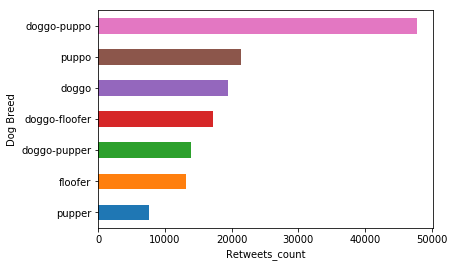

In [362]:
avg_fav_dog.plot(kind='barh');
plt.xlabel('Retweets_count')
plt.ylabel('Dog Breed');

In [363]:
top_rating_dogs = df_final.groupby(['dog_stage']).rating_numerator.mean().sort_values(ascending=False)
top_rating_dogs

dog_stage
doggo-puppo      13.000000
floofer          12.000000
puppo            11.952381
doggo            11.925926
doggo-pupper     11.142857
doggo-floofer    11.000000
pupper           10.963855
Name: rating_numerator, dtype: float64

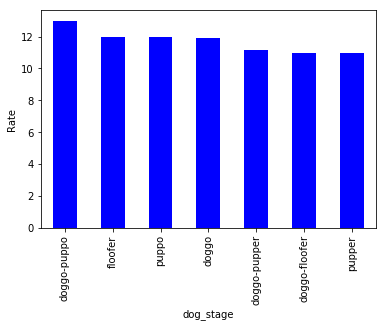

In [364]:
top_rating_dogs.plot(kind='bar',color="blue");
plt.xlabel('dog_stage')
plt.ylabel('Rate');

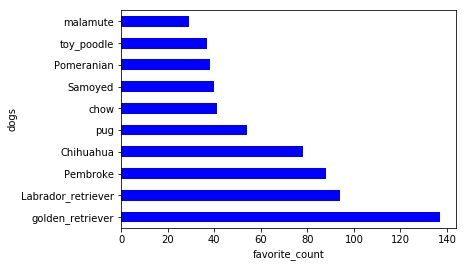

In [365]:
pred_1.plot(x= 'pred_1', y = 'favorite_count' ,kind='barh',color="blue");
plt.xlabel('favorite_count')
plt.ylabel('dogs');

In [366]:
rate = df_final.rating_numerator

In [370]:
source = df_final.source

In [367]:
date= df_final.timestamp

In [374]:
fav = df_final.favorite_count

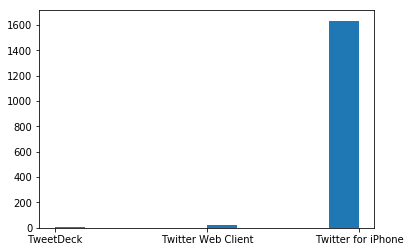

In [381]:
plt.hist(source, bins=10)
plt.show()

# Save final dataset as csv file

In [369]:
df_final.to_csv('twitter_archive_master.csv',index= False)